In [1]:
import h5py

def read_hdf5(filename, read_params=False, read_waveform=False, read_noisy_signals=False):
    """
    Read various types of data from an HDF5 file, with options to read parameters, waveforms, and noisy signals.

    Parameters:
        filename (str): The name of the HDF5 file to read the data from.
        read_params (bool): If True, read parameters from the HDF5 file.
        read_waveform (bool): If True, read waveforms from the HDF5 file.
        read_noisy_signals (bool): If True, read noisy signals from the HDF5 file.

    Returns:
        tuple: A tuple containing concatenated lists of parameters, waveforms, and noisy signals.
    """
    param_list = []
    waveform_list = []
    noisy_signal_list = []

    with h5py.File(filename, 'r') as f:
        if read_params:
            param_groups = [key for key in f.keys() if key.startswith('params_')]
            for group_name in param_groups:
                group = f[group_name]
                param_dict = {key: group[key][()] for key in group.keys()}
                param_list.append(param_dict)

        if read_waveform:
            waveform_groups = [key for key in f.keys() if key.startswith('waveforms_')]
            for group_name in waveform_groups:
                group = f[group_name]
                waveform_dict = {key: group[key][()] for key in group.keys()}
                waveform_list.append(waveform_dict)

        if read_noisy_signals:
            signal_groups = [key for key in f.keys() if key.startswith('signals_')]
            for group_name in signal_groups:
                group = f[group_name]
                signal_dict = {key: group[key][()] for key in group.keys()}
                noisy_signal_list.append(signal_dict)

    return param_list, waveform_list, noisy_signal_list


In [16]:
# Example usage
filename = 'BNS_25_1.hdf5'
param_list, waveform_list, noisy_signal_list = read_hdf5(filename, read_params=True, read_waveform=True, read_noisy_signals=True)

(5939.2, 6164.48)

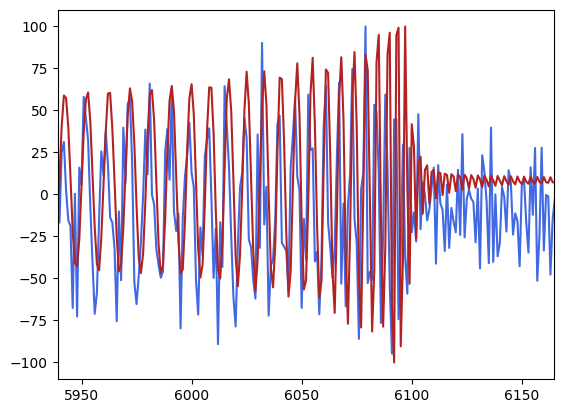

In [18]:
import matplotlib.pyplot as plt

plt.plot(noisy_signal_list[0]['H1'], color='royalblue')
plt.plot(waveform_list[0]['H1'], color='firebrick')
plt.xlim(1.45*4096, 1.505*4096) 